In [1]:
import glob
import os

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import xarray as xr

%matplotlib inline

In [2]:
 def bearing(east, north):
    radians = np.arctan2(east, north)
    degrees = radians*180./np.pi
    degrees[degrees<0] = degrees[degrees<0] +360
    return degrees

In [3]:
data_dir='/home/soontiensn/data/gpsc-work2/OPP/IC3-ciopse/ciopsev2/combined/'
files = glob.glob(os.path.join(data_dir,'*.nc'))
files.sort()

In [4]:
d = xr.open_dataset(files[0])
d

<xarray.Dataset>
Dimensions:         (time: 2127)
Coordinates:
  * time            (time) datetime64[ns] 2019-03-28T14:00:00 ... 2019-06-25T04:00:00
Data variables:
    lon             (time) float64 ...
    lat             (time) float64 ...
    ueast_ocean     (time) float64 ...
    vnorth_ocean    (time) float64 ...
    ueast_drifter   (time) float64 ...
    vnorth_drifter  (time) float64 ...
    gamma_real      (time) float64 ...
    gamma_imag      (time) float64 ...
Attributes:
    obs_platform_type:                 Drifting Buoy
    obs_model:                         SVP
    obs_buoyid:                        svp300234066032000D20190328
    obs_nafc_qc_comment:               Additional quality control provided by...
    obs_original_data_source_comment:  retrieved from Doug Schillinger (BIO)
    obs_approximate_drogue_depth:      15
    obs_original_filename:             svp300234066032000.csv
    obs_description:                   Drifting Buoys
    obs_comment:                

In [5]:
for t in ['ocean', 'drifter']:
    d['speed_{}'.format(t)] = np.sqrt(d['ueast_{}'.format(t)]**2 + d['vnorth_{}'.format(t)]**2)

In [12]:
d['speed_error'] = d['speed_ocean'] - d['speed_drifter']

In [6]:
for t in ['ocean', 'drifter']:
    d['bearing_{}'.format(t)] = xr.DataArray(bearing(d['ueast_{}'.format(t)].values, d['vnorth_{}'.format(t)].values),
                                             dims=('time'))

In [30]:
ocean_vector = []
drifter_vector = []
n = len(d['ueast_ocean'].values)
for i in range(n):
    ocean_vector.append(complex(d['ueast_ocean'].values[i], d['vnorth_ocean'].values[i]))
    drifter_vector.append(complex(d['ueast_drifter'].values[i], d['vnorth_drifter'].values[i]))
vector_difference = np.array(ocean_vector) - np.array(drifter_vector)
vector_difference_east = vector_difference.real
vector_difference_north = vector_difference.imag
d['ueast_vector_difference'] = xr.DataArray(vector_difference_east, dims=('time'))
d['vnorth_vector_difference'] = xr.DataArray(vector_difference_north, dims=('time'))
d['mag_vector_difference'] = np.sqrt(d['ueast_vector_difference']**2 + d['vnorth_vector_difference']**2)

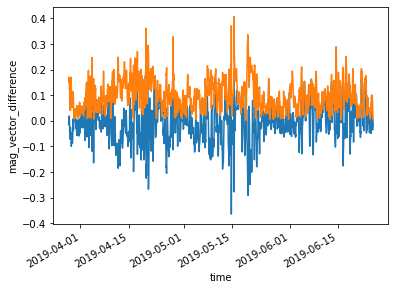

In [31]:
d.speed_error.plot(label='speed diff')
d.mag_vector_difference.plot(label='magnitude of vector difference')

In [32]:
d.speed_error.std()

<xarray.DataArray 'speed_error' ()>
array(0.073283)

In [33]:
d.speed_error.mean()

<xarray.DataArray 'speed_error' ()>
array(-0.004396)

In [34]:
np.abs(vector_difference) - d['mag_vector_difference']

<xarray.DataArray 'mag_vector_difference' (time: 2127)>
array([0., 0., 0., ..., 0., 0., 0.])
Coordinates:
  * time     (time) datetime64[ns] 2019-03-28T14:00:00 ... 2019-06-25T04:00:00

In [35]:
d.mag_vector_difference.mean()

<xarray.DataArray 'mag_vector_difference' ()>
array(0.101316)

In [36]:
d.mag_vector_difference.std()

<xarray.DataArray 'mag_vector_difference' ()>
array(0.057352)